# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 29s 0us/step


In [2]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

# Examine the shape of the training and test sets

train_shape = x_train.shape
test_shape = x_test.shape
image_shape = x_train[0].shape
num_classes = len(np.unique(y_train))

print(f'The shape of the training set: {train_shape}')
print(f'The shape of the test set: {test_shape}')
print(f'The dimension of the image: {image_shape}')
print(f'The number of classes: {num_classes}')

The shape of the training set: (50000, 32, 32, 3)
The shape of the test set: (10000, 32, 32, 3)
The dimension of the image: (32, 32, 3)
The number of classes: 100


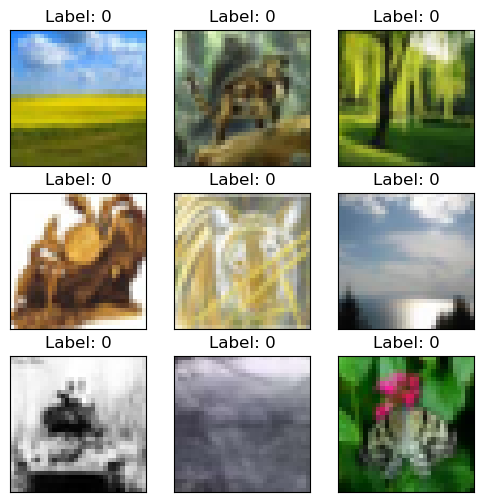

In [3]:
def display_sample_images(x, y, num_samples=9):
    random_indices = np.random.choice(len(x), num_samples, replace=False)
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))

    for i, ax in enumerate(axes.flat):
        ax.imshow(x[random_indices[i]])
        ax.set_title(f'Label: {np.argmax(y[random_indices[i]])}')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

display_sample_images(x_train, y_train)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Normalizing the pixel value of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Covert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set
x_train, x_test, y_train, y_test = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=42
    )



## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here
model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))

# Hidden layer
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 64)                1048640   
                                                                 
 dense_1 (Dense)             (None, 100)               6500      
                                                        

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [6]:
from keras import optimizers

# Your code here

from keras import optimizers

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
    

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your code here
history = model.fit(
    x_train, # Training data
    y_train, # Training labels
    epochs=20, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_data=(x_test, y_test) # Use 20% of the data for validation
)

Epoch 1/20
1250/1250 [==============================] - 81s 64ms/step - loss: 3.7914 - accuracy: 0.1296 - val_loss: 3.3196 - val_accuracy: 0.1926
Epoch 2/20
1250/1250 [==============================] - 79s 63ms/step - loss: 3.0726 - accuracy: 0.2496 - val_loss: 3.0108 - val_accuracy: 0.2585
Epoch 3/20
1250/1250 [==============================] - 78s 63ms/step - loss: 2.7337 - accuracy: 0.3144 - val_loss: 2.8517 - val_accuracy: 0.2953
Epoch 4/20
1250/1250 [==============================] - 81s 65ms/step - loss: 2.4602 - accuracy: 0.3692 - val_loss: 2.7803 - val_accuracy: 0.3082
Epoch 5/20
1250/1250 [==============================] - 89s 71ms/step - loss: 2.2266 - accuracy: 0.4163 - val_loss: 2.8268 - val_accuracy: 0.3083
Epoch 6/20
1250/1250 [==============================] - 76s 61ms/step - loss: 1.9979 - accuracy: 0.4679 - val_loss: 2.8962 - val_accuracy: 0.3138
Epoch 7/20
1250/1250 [==============================] - 81s 65ms/step - loss: 1.7802 - accuracy: 0.5191 - val_loss: 3.0277 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [8]:
# Your code here
from sklearn.metrics import classification_report, accuracy_score

# Report the accuracy of model

loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


# Model prediction

y_prediction = model.predict(x_test)
y_predicted_classes = np.argmax(y_prediction, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
classification_report_str = classification_report(y_true_classes, y_predicted_classes, digits=4)
classification_report_dict = classification_report(y_true_classes, y_predicted_classes, output_dict=True)

# Report another metric F1-score
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f'Value of metric: {f1_score:.4f}')

313/313 [==============================] - 12s 38ms/step - loss: 8.0049 - accuracy: 0.2630
Loss:     8.00
Accuracy: 26.30%
313/313 [==============================] - 13s 37ms/step
Value of metric: 0.2645


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

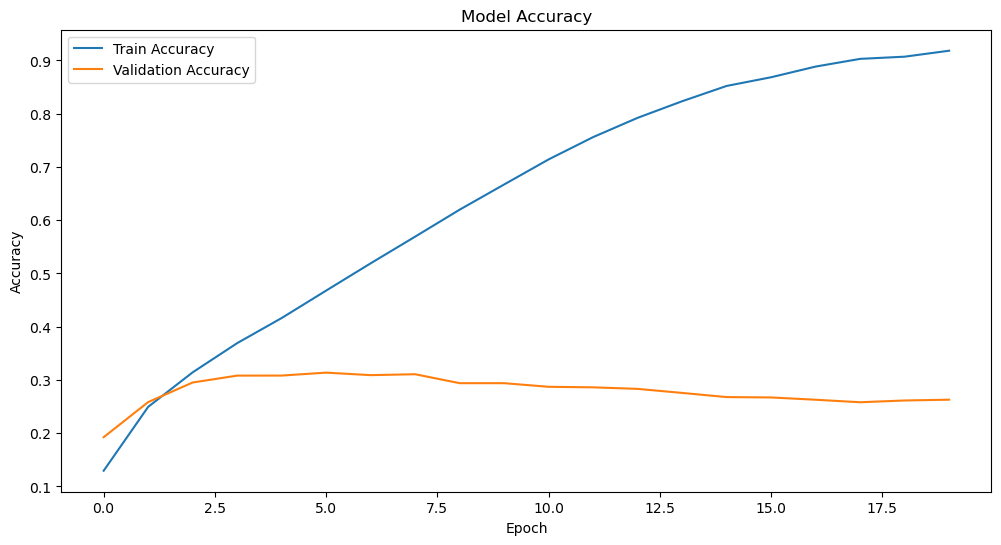

In [9]:
# Your code here
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

313/313 [==============================] - 7s 21ms/step
Correctly Classified Image Probabilities:
[0.01002898 0.01015724 0.00981244 0.01126705 0.00972231 0.00981154
 0.01121978 0.00993481 0.01151179 0.0097535  0.00948167 0.01009085
 0.00997943 0.01007472 0.01139669 0.01006298 0.01140462 0.01009262
 0.01021118 0.00991639 0.01127091 0.01222773 0.00986264 0.00951216
 0.00932439 0.01050448 0.01041479 0.0077318  0.01153667 0.00892192
 0.01046959 0.00928064 0.00904241 0.00878549 0.0102029  0.00886067
 0.01037141 0.00958906 0.00914862 0.01035521 0.01037796 0.00951258
 0.01083384 0.0097254  0.00977088 0.01141744 0.0097419  0.0090016
 0.01073653 0.00921815 0.01033177 0.00997953 0.00911605 0.0090478
 0.01046226 0.00861955 0.00924061 0.0120275  0.00993839 0.01012939
 0.01110507 0.01132565 0.00926943 0.00949418 0.0093192  0.01077264
 0.01007594 0.01034093 0.01138092 0.00931549 0.00982308 0.00984882
 0.01051124 0.01040056 0.0101238  0.00957491 0.00858948 0.01024888
 0.00962591 0.00902944 0.01061954

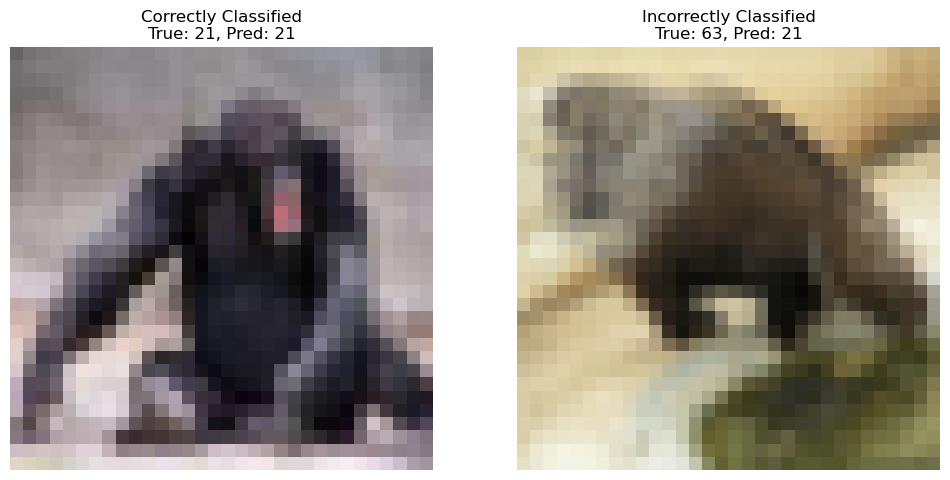

In [12]:
# Your code here
y_predictions = model.predict(x_test)
y_predicted_classes = np.argmax(y_predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Get the index of the correctly and incorrectly classified model in test set
correct_indices = np.where(y_predicted_classes == y_true_classes)[0]
incorrect_indices = np.where(y_predicted_classes != y_true_classes)[0]

# Select one correctly and one incorrectly classified model in test set
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correctly classified image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nTrue: {y_true_classes[correct_idx]}, Pred: {y_predicted_classes[correct_idx]}")
plt.axis('off')

print("Correctly Classified Image Probabilities:")
print(y_predictions[correct_idx])

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {y_true_classes[incorrect_idx]}, Pred: {y_predicted_classes[incorrect_idx]}")
plt.axis('off')

print("\nIncorrectly Classified Image Probabilities:")
print(y_predictions[incorrect_idx])

plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [13]:

from keras.optimizers import SGD

model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))

# Hidden layer
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(100, activation='softmax'))

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1048640   
                                                                 
 dense_5 (Dense)             (None, 100)               6500      
                                                      

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [11]:
# Your code here

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test)
)

# Evaluate the accuracy
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

# Model prediction

y_prediction = model.predict(x_test)
y_predicted_classes = np.argmax(y_prediction, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
classification_report_str = classification_report(y_true_classes, y_predicted_classes, digits=4)
classification_report_dict = classification_report(y_true_classes, y_predicted_classes, output_dict=True)

# Report another metric F1-score
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f'Value of metric: {f1_score:.4f}')
     


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1048640   
                                                                 
 dense_3 (Dense)             (None, 100)               6500      
                                                      

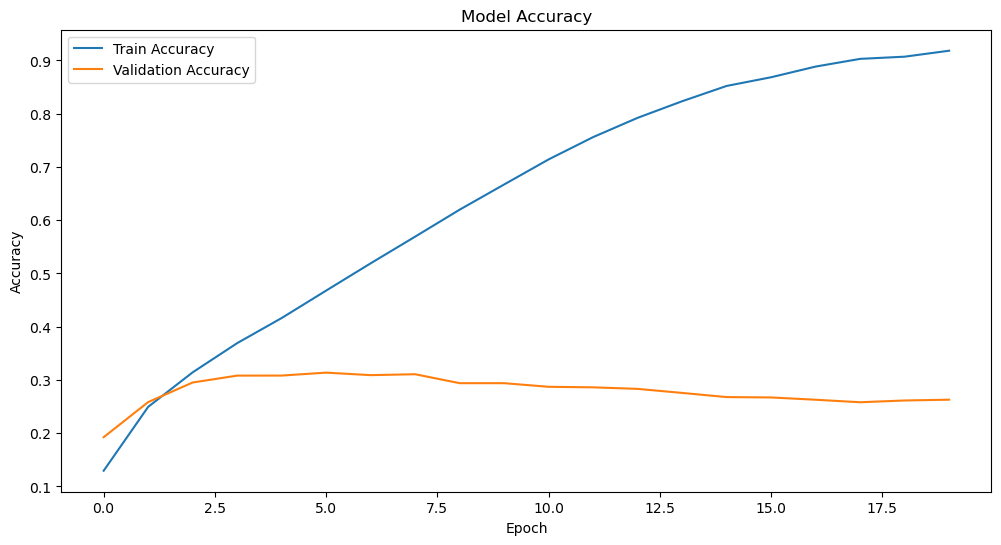

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

313/313 [==============================] - 8s 25ms/step
Correctly Classified Image Probabilities:
[0.01070468 0.00980171 0.01073676 0.00849583 0.00996302 0.01189152
 0.00875747 0.01054999 0.01095605 0.00961715 0.01011274 0.00870778
 0.01048608 0.01068132 0.0088471  0.01022027 0.00941775 0.009151
 0.00950266 0.0102588  0.00934208 0.00914422 0.00984328 0.00952709
 0.00902973 0.00930669 0.0106242  0.01047768 0.00900656 0.00988593
 0.00960952 0.00976859 0.00868695 0.00915213 0.00947633 0.00841822
 0.01005174 0.00901348 0.00991473 0.00973828 0.00912597 0.00979846
 0.0095357  0.00964904 0.01024686 0.0097536  0.01011475 0.01131403
 0.01074339 0.00927159 0.01142936 0.0096454  0.01008069 0.01019594
 0.00955841 0.00887815 0.01044503 0.01011871 0.0097964  0.0090401
 0.0106626  0.01053855 0.01004989 0.01048677 0.0119197  0.0098183
 0.00937737 0.00913377 0.01144678 0.00917172 0.00981408 0.0108715
 0.01176217 0.01000506 0.01191306 0.00961578 0.01050602 0.00961296
 0.0111674  0.01030152 0.01071076 0.

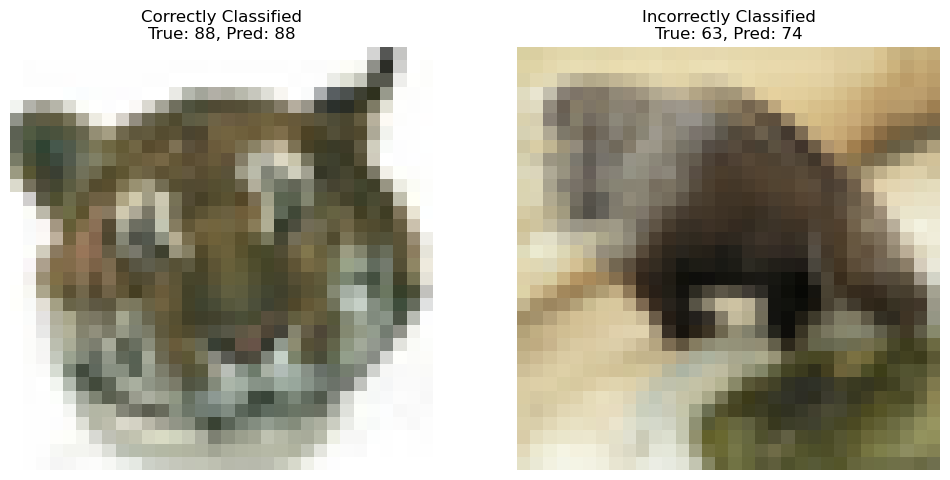

In [15]:
y_predictions = model.predict(x_test)
y_predicted_classes = np.argmax(y_predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Get the index of the correctly and incorrectly classified model in test set
correct_indices = np.where(y_predicted_classes == y_true_classes)[0]
incorrect_indices = np.where(y_predicted_classes != y_true_classes)[0]

# Select one correctly and one incorrectly classified model in test set
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correctly classified image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nTrue: {y_true_classes[correct_idx]}, Pred: {y_predicted_classes[correct_idx]}")
plt.axis('off')

print("Correctly Classified Image Probabilities:")
print(y_predictions[correct_idx])

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {y_true_classes[incorrect_idx]}, Pred: {y_predicted_classes[incorrect_idx]}")
plt.axis('off')

print("\nIncorrectly Classified Image Probabilities:")
print(y_predictions[incorrect_idx])

plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.